In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Read the dataset
df = pd.read_csv('scaled_X_features.csv')

# Separate the features (X) and target variable (y)
X = df.drop('learning_style', axis=1)
y = df['learning_style']


# Create an instance of the SMOTE class
smote = SMOTE()

# Apply SMOTE on the entire dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)



# Print the balanced class distribution
print('Original class distribution:', y.value_counts())
print('Resampled class distribution:', y_resampled.value_counts())


Original class distribution: 0    523
3    427
2     43
1      7
Name: learning_style, dtype: int64
Resampled class distribution: 0    523
3    523
2    523
1    523
Name: learning_style, dtype: int64


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter settings for SVM
svm_params = {

    'C': 100, 'gamma': 1, 'kernel': 'linear','class_weight': None
}

# Create the SVM classifier with the specified parameters
svm_classifier = SVC(**svm_params)

# Define the parameter settings for Random Forest
rf_params = {
    'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300,'random_state':0
}

# Create the Random Forest classifier with the specified parameters
rf_classifier = RandomForestClassifier(**rf_params)

# Create the voting classifier that combines the predictions of the two models
voting_classifier = VotingClassifier(
    estimators=[('svm', svm_classifier), ('rf', rf_classifier)],
    voting='hard'  # or 'soft' for probabilistic voting
)

# Train the voting classifier on your training data
voting_classifier.fit(X_train, y_train)  # Replace X_train and y_train with your actual training data

# Make predictions on the test data using the voting classifier
y_pred = voting_classifier.predict(X_test)  # Replace X_test with your actual test data

# Calculate the accuracy of the ensemble model
accuracy = accuracy_score(y_test, y_pred)  # Replace y_test with your actual test labels

print("Ensemble Model Accuracy:", accuracy)


Ensemble Model Accuracy: 0.9554140127388535


In [ ]:
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import confusion_matrix, accuracy_score
y_pred2 = voting_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[152   0   2   2]
 [  0 146   0   0]
 [  0   0 168   0]
 [ 21   0   5 132]]


0.9522292993630573

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

Accuracy of en 0.9522292993630573
F1 score of en 0.95291936258526




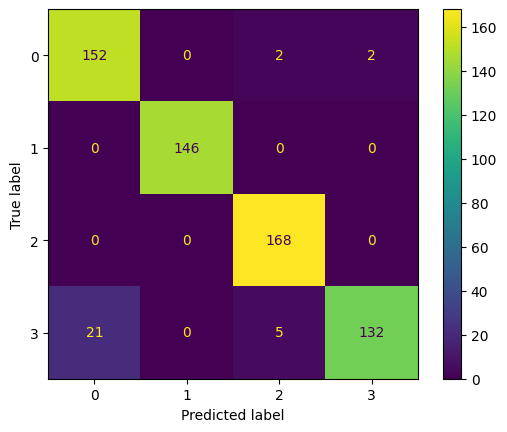

In [ ]:

pred_en=voting_classifier.predict(X_test)
score_en=accuracy_score(y_test,y_pred2)
f1_en = f1_score(y_pred2, y_test, average="weighted")

print('Accuracy of en',score_en)
print('F1 score of en',f1_en)
print("\n")

cm = confusion_matrix(y_test, pred_en, labels=voting_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=voting_classifier.classes_)
disp.plot()

In [ ]:
from sklearn.model_selection import cross_val_score





# Perform cross-validation
cv_scores = cross_val_score(voting_classifier, X_train, y_train, cv=5)

# Print the accuracy scores for each fold
print("Cross-validation scores:", cv_scores)

# Compute the mean accuracy across all folds
mean_accuracy = cv_scores.mean()
print("Mean accuracy:", mean_accuracy)

print("Accuracy: {:.2f} %".format(cv_scores.mean()*100))
print("Standard Deviation: {:.2f} %".format(cv_scores.std()*100))


Cross-validation scores: [0.93515358 0.94539249 0.93174061 0.94539249 0.95205479]
Mean accuracy: 0.941946795081584
Accuracy: 94.19 %
Standard Deviation: 0.74 %


In [ ]:
from sklearn.metrics import classification_report

# Assuming you have predicted labels stored in `y_pred` and true labels stored in `y_true`
print(classification_report(y_test, y_pred2, zero_division=0))


              precision    recall  f1-score   support

           0       0.88      0.97      0.92       156
           1       1.00      1.00      1.00       146
           2       0.96      1.00      0.98       168
           3       0.99      0.84      0.90       158

    accuracy                           0.95       628
   macro avg       0.96      0.95      0.95       628
weighted avg       0.96      0.95      0.95       628



In [ ]:
import numpy as np

# Assuming you have a trained model named 'model'

# Input features as a single list
input_features = [0.1	,0.35	,0.1	,0.6	,0.1	,0.5	,0.916666667	,0.75,	0.794117647	,0.635555556	,0.166666667	,0.5	,0.266666667	,0.846666667	,0	,0.072	,0.28]

# Convert the input features to a NumPy array and reshape it to match the model's input shape
input_features = np.array(input_features).reshape(1, -1)

# Make predictions on the input features
prediction = voting_classifier.predict(input_features)

# Print the predicted target label
print("Predicted target label:", prediction[0])


Predicted target label: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np

# Assuming you have already trained and saved your classifier as 'classifier.pkl'
import joblib

# Load the pickled model
classifier = joblib.load('model.pkl')

# Define the names of your input features
feature_names = ['Amount of time spent by learners interacting with images', 'Amount of time spent on video related materials', 'Amount of time spent on text based material', 'Amount of time spent on audio related materials', 'complexity or depth of the learning material', 'Frequency of PowerPoint usage', 'Concrete contents', 'Performance or achievement of the learner ', 'Number of correctly answered standard questions','Number of messages or posts posted by the learner','Time or duration spent by the learner in solving exercises','Number of group discussions','Number of lessons of learning objectives skipped','Number of times the learner utilized the Next button','Amount of Time Spent in sessions',' Number of questions on topics','Number of questions or queries posed by the learner']

# Get input feature values from the user
input_features = []
for i in range(len(feature_names)):
    value = float(input(f"Enter value for {feature_names[i]}: "))
    input_features.append(value)

# Convert input features to a numpy array
input_features = np.array(input_features).reshape(1, -1)



target_label = classifier.predict(input_features)

# Create a dictionary to map the numeric labels to their corresponding labels
label_mapping = {0: 'Processing', 1: 'Understanding', 2: 'Input', 3: 'Perception'}

# Print the predicted target label with its corresponding label
predicted_label = label_mapping[target_label[0]]
print("Predicted target label:", predicted_label)


Enter value for Amount of time spent by learners interacting with images: 13
Enter value for Amount of time spent on video related materials: 20
Enter value for Amount of time spent on text based material: 16
Enter value for Amount of time spent on audio related materials: 47
Enter value for complexity or depth of the learning material: 31
Enter value for Frequency of PowerPoint usage: 20
Enter value for Concrete contents: 8
Enter value for Performance or achievement of the learner : 7
Enter value for Number of correctly answered standard questions: 6
Enter value for Number of messages or posts posted by the learner: 5
Enter value for Time or duration spent by the learner in solving exercises: 23
Enter value for Number of group discussions: 33
Enter value for Number of lessons of learning objectives skipped: 25
Enter value for Number of times the learner utilized the Next button: 28
Enter value for Amount of Time Spent in sessions: 29
Enter value for  Number of questions on topics: 13


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib

# Load the pickled model
classifier = joblib.load('model.pkl')

# Define the names of your input features
feature_names = ['Amount of time spent by learners interacting with images', 'Amount of time spent on video related materials', 'Amount of time spent on text based material', 'Amount of time spent on audio related materials', 'complexity or depth of the learning material', 'Frequency of PowerPoint usage', 'Concrete contents', 'Performance or achievement of the learner ', 'Number of correctly answered standard questions','Number of messages or posts posted by the learner','Time or duration spent by the learner in solving exercises','Number of group discussions','Number of lessons of learning objectives skipped','Number of times the learner utilized the Next button','Amount of Time Spent in sessions',' Number of questions on topics','Number of questions or queries posed by the learner']

# Get input feature values from the user
input_features = []
for i in range(len(feature_names)):
    value = float(input(f"Enter value for {feature_names[i]}: "))
    input_features.append(value)

# Convert input features to a numpy array
input_features = np.array(input_features).reshape(1, -1)

# Scale the input features using MinMaxScaler
scaler = MinMaxScaler()
scaled_input_features = scaler.fit_transform(input_features)

# Predict the target label for the scaled input features
target_label = classifier.predict(scaled_input_features)

# Create a dictionary to map the numeric labels to their corresponding labels
label_mapping = {0: 'Processing', 1: 'Understanding', 2: 'Input', 3: 'Perception'}

# Print the predicted target label with its corresponding label
predicted_label = label_mapping[target_label[0]]
print("Predicted target label:", predicted_label)


Enter value for Amount of time spent by learners interacting with images: 40
Enter value for Amount of time spent on video related materials: 40
Enter value for Amount of time spent on text based material: 40
Enter value for Amount of time spent on audio related materials: 40
Enter value for complexity or depth of the learning material: 10
Enter value for Frequency of PowerPoint usage: 28
Enter value for Concrete contents: 10
Enter value for Performance or achievement of the learner : 13
Enter value for Number of correctly answered standard questions: 14
Enter value for Number of messages or posts posted by the learner: 13
Enter value for Time or duration spent by the learner in solving exercises: 25
Enter value for Number of group discussions: 18
Enter value for Number of lessons of learning objectives skipped: 23
Enter value for Number of times the learner utilized the Next button: 24
Enter value for Amount of Time Spent in sessions: 25
Enter value for  Number of questions on topics:

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
import joblib
from sklearn.preprocessing import MinMaxScaler

# Load the pickled model
classifier = joblib.load('model.pkl')

# Define the names of your input features
feature_names = ['Amount of time spent by learners interacting with images', 'Amount of time spent on video related materials', 'Amount of time spent on text based material', 'Amount of time spent on audio related materials', 'complexity or depth of the learning material', 'Frequency of PowerPoint usage', 'Concrete contents', 'Performance or achievement of the learner ', 'Number of correctly answered standard questions','Number of messages or posts posted by the learner','Time or duration spent by the learner in solving exercises','Number of group discussions','Number of lessons of learning objectives skipped','Number of times the learner utilized the Next button','Amount of Time Spent in sessions',' Number of questions on topics','Number of questions or queries posed by the learner']

# Get input feature values from the user
input_features = []
for i in range(len(feature_names)):
    value = float(input(f"Enter value for {feature_names[i]}: "))
    input_features.append(value)

# Convert input features to a numpy array
input_features = np.array(input_features).reshape(1, -1)

# Load the scaler
scaler = MinMaxScaler()

# Fit the scaler on the X_train dataset
scaler.fit(X_train)

# Scale the input features
scaled_input_features = scaler.transform(input_features)

# Predict the target label for the scaled input features
target_label = classifier.predict(scaled_input_features)

# Create a dictionary to map the numeric labels to their corresponding labels
label_mapping = {0: 'Processing', 1: 'Understanding', 2: 'Input', 3: 'Perception'}

# Print the predicted target label with its corresponding label
predicted_label = label_mapping[target_label[0]]
print("Predicted target label:", predicted_label)


Enter value for Amount of time spent by learners interacting with images: 5
Enter value for Amount of time spent on video related materials: 9
Enter value for Amount of time spent on text based material: 0
Enter value for Amount of time spent on audio related materials: 10
Enter value for complexity or depth of the learning material: 0
Enter value for Frequency of PowerPoint usage: 0
Enter value for Concrete contents: 0
Enter value for Performance or achievement of the learner : 0
Enter value for Number of correctly answered standard questions: 0
Enter value for Number of messages or posts posted by the learner: 0
Enter value for Time or duration spent by the learner in solving exercises: 0
Enter value for Number of group discussions: 0
Enter value for Number of lessons of learning objectives skipped: 20
Enter value for Number of times the learner utilized the Next button: 0
Enter value for Amount of Time Spent in sessions: 0
Enter value for  Number of questions on topics: 0
Enter valu

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


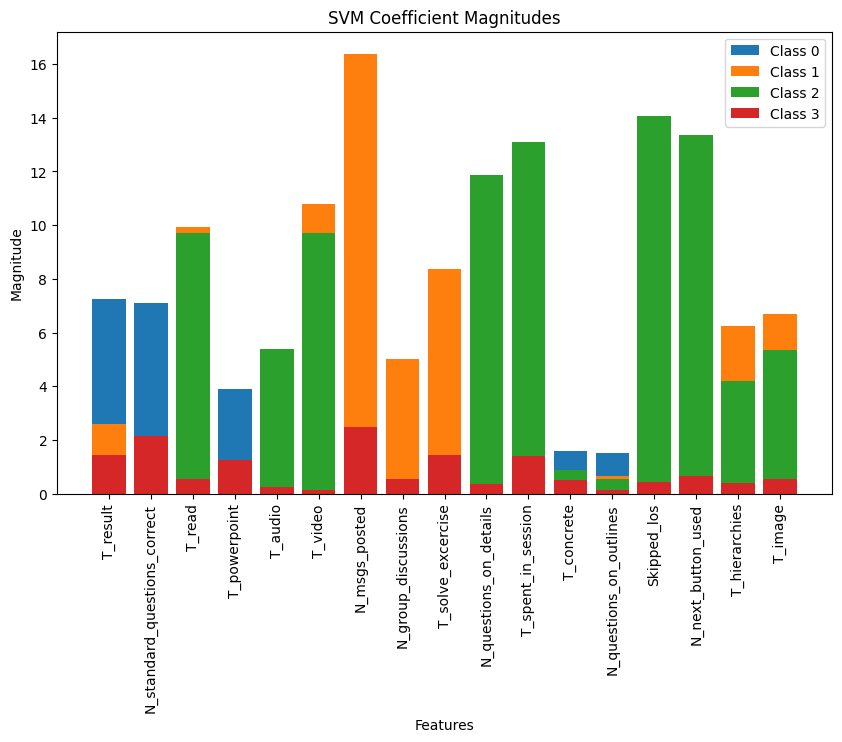

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Train the SVM classifier
model = SVC(C= 100, gamma= 1, kernel= 'linear',class_weight=None)
 #'C': 100, 'gamma': 1, 'kernel': 'rbf','class_weight': None
model.fit(X_train, y_train)

# Get the absolute magnitudes of the coefficients for each class
coefficients = np.abs(model.coef_)
class_names = model.classes_

# Plot the coefficients for each class
plt.figure(figsize=(10, 6))
for i, class_name in enumerate(class_names):
    sorted_indices = coefficients[i].argsort()[::-1]
    sorted_coefficients = coefficients[i][sorted_indices]
    feature_names = X.columns[sorted_indices]
    plt.bar(feature_names, sorted_coefficients, label=f"Class {class_name}")

plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Magnitude')
plt.title('SVM Coefficient Magnitudes')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Read the dataset
df = pd.read_csv('scaled_X_features.csv')

# Separate the features (X) and target variable (y)
X = df.drop('learning_style', axis=1)
y = df['learning_style']






# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



import numpy as np
import joblib
from sklearn.preprocessing import MinMaxScaler

# Load the pickled model
classifier = joblib.load('model.pkl')

# Define the names of your input features
feature_names = ['Amount of time spent by learners interacting with images', 'Amount of time spent on video related materials', 'Amount of time spent on text based material', 'Amount of time spent on audio related materials', 'complexity or depth of the learning material', 'Frequency of PowerPoint usage', 'Concrete contents', 'Performance or achievement of the learner ', 'Number of correctly answered standard questions','Number of messages or posts posted by the learner','Time or duration spent by the learner in solving exercises','Number of group discussions','Number of lessons of learning objectives skipped','Number of times the learner utilized the Next button','Amount of Time Spent in sessions',' Number of questions on topics','Number of questions or queries posed by the learner']

# Get input feature values from the user
input_features = []
for i in range(len(feature_names)):
    value = float(input(f"Enter value for {feature_names[i]}: "))
    input_features.append(value)

# Convert input features to a numpy array
input_features = np.array(input_features).reshape(1, -1)

# Load the scaler
scaler = MinMaxScaler()

# Fit the scaler on the X_train dataset
scaler.fit(X_train)

# Scale the input features
scaled_input_features = scaler.transform(input_features)

# Predict the target label for the scaled input features
target_label = classifier.predict(scaled_input_features)

# Create a dictionary to map the numeric labels to their corresponding labels
label_mapping = {0: 'Processing', 1: 'Understanding', 2: 'Input', 3: 'Perception'}

# Print the predicted target label with its corresponding label
predicted_label = label_mapping[target_label[0]]
print("Predicted target label:", predicted_label)


Enter value for Amount of time spent by learners interacting with images: 23
Enter value for Amount of time spent on video related materials: 0
Enter value for Amount of time spent on text based material: 1
Enter value for Amount of time spent on audio related materials: 4
Enter value for complexity or depth of the learning material: 3
Enter value for Frequency of PowerPoint usage: 2
Enter value for Concrete contents: 5
Enter value for Performance or achievement of the learner : 8
Enter value for Number of correctly answered standard questions: 4
Enter value for Number of messages or posts posted by the learner: 3
Enter value for Time or duration spent by the learner in solving exercises: 2
Enter value for Number of group discussions: 3
Enter value for Number of lessons of learning objectives skipped: 8
Enter value for Number of times the learner utilized the Next button: 7
Enter value for Amount of Time Spent in sessions: 4
Enter value for  Number of questions on topics: 6
Enter value

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
